In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Regularization in Neural Networks

The number of input and output units in a neural network is generally determined by the dimensionality of the data set, whereas the number $ M $ of hidden units is a free parameter that can be adjusted to give the best predictive performance. Note that $ M $ controls the number of parameters (weights and biases) in the network, and so we might expect that in a maximum likelihood setting there will be an optimum value of $ M $ that gives the best generalization performance, corresponding to the optimum balance between underfitting and overfitting. 

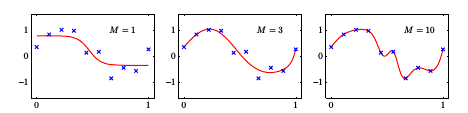

Fig.9 Examples of two-layer networks trained on 10 data points drawn from the sinusoidal data set. The graphs show the result of ﬁtting networks having M = 1, 3 and 10 hidden units, respectively, by minimizing a sum-of-squares error function using a scaled conjugate-gradient algorithm.

Figure 5.9 shows an example of the effect of different values of $ M $ for the sinusoidal regression problem.

The generalization error, however, is not a simple function of $ M $ due to the presence of local minima in the error function, as illustrated in Fig.10. Here we see the effect of choosing multiple random initializations for the weight vector for a range of values of $ M $. The overall best validation set performance in this case occurred for a particular solution having $ M = 8 $.

In practice, one approach to choosing $ M $ is in fact to plot a graph of the kind shown in Fig.10 and then to choose the specific solution having the smallest validation set error. There are, however, other ways to control the complexity of a neural network model in order to avoid overfitting. From our discussion of polynomial curve fitting in Chapter 1, we see that an alternative approach is to choose a relatively large value for $ M $ and then to control complexity by the addition of a regularization term to the error function.

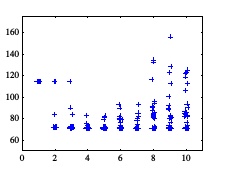

Fig.10 Plot of the sum-of-squares test-set error for the polynomial data set versus the number of hidden units in the network, with 30 random starts for each network size, showing the ef- fect of local minima. For each new start, the weight vector was initial- ized by sampling from an isotropic Gaussian distribution having a mean of zero and a variance of 10.


The simplest regularizer is the quadratic, giving a regularized error:

$$
E_{\text{reg}}(w) = E(w) + \frac{\lambda}{2} w^T w
$$

This regularizer is also known as weight decay and has been discussed at length in Chapter 3. The effective model complexity is then determined by the choice of the regularization coefficient $ \lambda $. As we have seen previously, this regularizer can be interpreted as the negative logarithm of a zero-mean Gaussian prior distribution over the weight vector $ w $.

##  Consistent Gaussian Priors

One of the limitations of simple weight decay in the form

$$
E_{\text{reg}}(w) = E(w) + \frac{\lambda}{2} w^T w
$$

is that it is inconsistent with certain scaling properties of network mappings. To illustrate this, consider a multilayer perceptron network having two layers of weights and linear output units, which performs a mapping from a set of input variables $ \{x_i\} $ to a set of output variables $ \{y_k\} $. The activations of the hidden units in the first hidden layer are given by

$$
z_j = h\left( \sum_i w_{ji} x_i + w_j^0 \right)
$$

while the activations of the output units are given by

$$
y_k = \sum_j w_{kj} z_j + w_k^0
$$

Suppose we perform a linear transformation of the input data of the form

$$
x_i \rightarrow \tilde{x}_i = a x_i + b
$$

Then we can arrange for the mapping performed by the network to be unchanged by making a corresponding linear transformation of the weights and biases from the inputs to the units in the hidden layer:

$$
w_{ji} \rightarrow \tilde{w}_{ji} = a w_{ji}
$$

$$
w_j^0 \rightarrow \tilde{w}_j^0 = w_j^0 - a \sum_i w_{ji}
$$

Similarly, a linear transformation of the output variables of the network of the form

$$
y_k \rightarrow \tilde{y}_k = c y_k + d
$$

can be achieved by making a transformation of the second-layer weights and biases:

$$
w_{kj} \rightarrow \tilde{w}_{kj} = c w_{kj}
$$

$$
w_k^0 \rightarrow \tilde{w}_k^0 = c w_k^0 + d
$$

If we train one network using the original data and one network using data for which the input and/or target variables are transformed by one of the above linear transformations, then consistency requires that we should obtain equivalent networks that differ only by the linear transformation of the weights as given. Any regularizer should be consistent with this property; otherwise, it arbitrarily favours one solution over another, equivalent one.

Clearly, simple weight decay

$$
E_{\text{reg}}(w) = E(w) + \frac{\lambda}{2} w^T w
$$

that treats all weights and biases on an equal footing does not satisfy this property. We therefore look for a regularizer which is invariant under the linear transformations. These require that the regularizer should be invariant to rescaling of the weights and to shifts of the biases. Such a regularizer is given by

$$
E_{\text{reg}}(w) = \lambda_1 \sum_{w \in W_1} \|w\|^2 + \lambda_2 \sum_{w \in W_2} \|w\|^2
$$

where $ W_1 $ denotes the set of weights in the first layer, $ W_2 $ denotes the set of weights in the second layer, and biases are excluded from the summations. This regularizer will remain unchanged under the weight transformations, provided the regularization parameters are rescaled as follows:

$$
\lambda_1 \rightarrow a^{1/2} \lambda_1
$$

$$
\lambda_2 \rightarrow c^{-1/2} \lambda_2
$$

The regularizer

$$
E_{\text{reg}}(w) \propto \exp \left( -\frac{1}{2} \sum_{w \in W_1} \|w\|^2 - \frac{1}{2} \sum_{w \in W_2} \|w\|^2 \right)
$$

corresponds to a prior of the form

$$
p(w | \alpha_1, \alpha_2) \propto \exp \left( -\frac{1}{2} \sum_{w \in W_1} \|w\|^2 - \frac{1}{2} \sum_{w \in W_2} \|w\|^2 \right)
$$

Note that priors of this form are improper (they cannot be normalized) because the bias parameters are unconstrained. The use of improper priors can lead to difficulties in selecting regularization coefficients and in model comparison within the Bayesian framework, because the corresponding evidence is zero. It is therefore common to include separate priors for the biases, which then break shift invariance, having their own hyperparameters.

## Regularization in Neural Networks

The number of input and output units in a neural network is generally determined by the dimensionality of the data set, whereas the number \( M \) of hidden units is a free parameter that can be adjusted to give the best predictive performance. Note that \( M \) controls the number of parameters (weights and biases) in the network, and so we might expect that in a maximum likelihood setting there will be an optimum value of \( M \) that gives the best generalization performance, corresponding to the optimum balance between underfitting and overfitting. Figure 5.9 shows an example of the effect of different values of \( M \) for the sinusoidal regression problem.

The generalization error, however, is not a simple function of $ M $ due to the presence of local minima in the error function, as illustrated in Fig.10. Here we see the effect of choosing multiple random initializations for the weight vector for a range of values of $ M $. The overall best validation set performance in this case occurred for a particular solution having $ M = 8 $.

In practice, one approach to choosing $ M $ is in fact to plot a graph of the kind shown in Figure 5.10 and then to choose the specific solution having the smallest validation set error. There are, however, other ways to control the complexity of a neural network model in order to avoid overfitting. From our discussion of polynomial curve fitting in Chapter 1, we see that an alternative approach is to choose a relatively large value for $ M $ and then to control complexity by the addition of a regularization term to the error function.

The simplest regularizer is the quadratic, giving a regularized error:

$$
E_{\text{reg}}(w) = E(w) + \frac{\lambda}{2} w^T w
$$

This regularizer is also known as weight decay and has been discussed at length in Chapter 3. The effective model complexity is then determined by the choice of the regularization coefficient \( \lambda \). As we have seen previously, this regularizer can be interpreted as the negative logarithm of a zero-mean Gaussian prior distribution over the weight vector \( w \).

##  Consistent Gaussian Priors

One of the limitations of simple weight decay in the form

$$
E_{\text{reg}}(w) = E(w) + \frac{\lambda}{2} w^T w
$$

is that it is inconsistent with certain scaling properties of network mappings. To illustrate this, consider a multilayer perceptron network having two layers of weights and linear output units, which performs a mapping from a set of input variables $ \{x_i\} $ to a set of output variables $ \{y_k\} $. The activations of the hidden units in the first hidden layer are given by

$$
z_j = h\left( \sum_i w_{ji} x_i + w_j^0 \right)
$$

while the activations of the output units are given by

$$
y_k = \sum_j w_{kj} z_j + w_k^0
$$

Suppose we perform a linear transformation of the input data of the form

$$
x_i \rightarrow \tilde{x}_i = a x_i + b
$$

Then we can arrange for the mapping performed by the network to be unchanged by making a corresponding linear transformation of the weights and biases from the inputs to the units in the hidden layer:

$$
w_{ji} \rightarrow \tilde{w}_{ji} = a w_{ji}
$$

$$
w_j^0 \rightarrow \tilde{w}_j^0 = w_j^0 - a \sum_i w_{ji}
$$

Similarly, a linear transformation of the output variables of the network of the form

$$
y_k \rightarrow \tilde{y}_k = c y_k + d
$$

can be achieved by making a transformation of the second-layer weights and biases:

$$
w_{kj} \rightarrow \tilde{w}_{kj} = c w_{kj}
$$

$$
w_k^0 \rightarrow \tilde{w}_k^0 = c w_k^0 + d
$$

If we train one network using the original data and one network using data for which the input and/or target variables are transformed by one of the above linear transformations, then consistency requires that we should obtain equivalent networks that differ only by the linear transformation of the weights as given. Any regularizer should be consistent with this property; otherwise, it arbitrarily favours one solution over another, equivalent one.

Clearly, simple weight decay

$$
E_{\text{reg}}(w) = E(w) + \frac{\lambda}{2} w^T w
$$

that treats all weights and biases on an equal footing does not satisfy this property. We therefore look for a regularizer which is invariant under the linear transformations. These require that the regularizer should be invariant to rescaling of the weights and to shifts of the biases. Such a regularizer is given by

$$
E_{\text{reg}}(w) = \lambda_1 \sum_{w \in W_1} \|w\|^2 + \lambda_2 \sum_{w \in W_2} \|w\|^2
$$

where $ W_1 $ denotes the set of weights in the first layer, $ W_2 $ denotes the set of weights in the second layer, and biases are excluded from the summations. This regularizer will remain unchanged under the weight transformations, provided the regularization parameters are rescaled as follows:

$$
\lambda_1 \rightarrow a^{1/2} \lambda_1
$$

$$
\lambda_2 \rightarrow c^{-1/2} \lambda_2
$$

The regularizer

$$
E_{\text{reg}}(w) \propto \exp \left( -\frac{1}{2} \sum_{w \in W_1} \|w\|^2 - \frac{1}{2} \sum_{w \in W_2} \|w\|^2 \right)
$$

corresponds to a prior of the form

$$
p(w | \alpha_1, \alpha_2) \propto \exp \left( -\frac{1}{2} \sum_{w \in W_1} \|w\|^2 - \frac{1}{2} \sum_{w \in W_2} \|w\|^2 \right)
$$

Note that priors of this form are improper (they cannot be normalized) because the bias parameters are unconstrained. The use of improper priors can lead to difficulties in selecting regularization coefficients and in model comparison within the Bayesian framework, because the corresponding evidence is zero. It is therefore common to include separate priors for the biases, which then break shift invariance, having their own hyperparameters.



In [2]:
import random
import math

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Mean Squared Error Loss Function with Regularization
def loss_with_regularization(y_pred, y_true, weights1, weights2, lambda_reg):
    mse = sum((y_pred[i] - y_true[i]) ** 2 for i in range(len(y_pred))) / len(y_pred)
    
    # Weight decay (L2 regularization)
    l2_loss = lambda_reg * (sum(w ** 2 for row in weights1 for w in row) +
                            sum(w ** 2 for row in weights2 for w in row)) / 2
    
    return mse + l2_loss

# Forward pass of the neural network
def forward_pass(X, weights1, weights2):
    # Hidden layer activations
    z_hidden = [0] * len(weights1[0])
    for j in range(len(weights1[0])):
        z_hidden[j] = sum(X[i] * weights1[i][j] for i in range(len(X))) + weights1[-1][j]
    
    a_hidden = [sigmoid(z) for z in z_hidden]
    
    # Output layer activations
    z_output = [0] * len(weights2[0])
    for k in range(len(weights2[0])):
        z_output[k] = sum(a_hidden[j] * weights2[j][k] for j in range(len(a_hidden))) + weights2[-1][k]
    
    y_output = z_output  # Linear output (no activation function)
    
    return a_hidden, z_hidden, y_output

# Backpropagation to compute gradients
def backpropagate(X, T, a_hidden, z_hidden, y_output, weights1, weights2, lambda_reg):
    # Compute output layer errors
    delta_output = [0] * len(T)
    for k in range(len(T)):
        delta_output[k] = (y_output[k] - T[k])
    
    # Compute gradients for weights2
    grad_w2 = [[0] * len(weights2[0]) for _ in range(len(weights2))]
    for j in range(len(a_hidden)):  # Loop over hidden layer activations
        for k in range(len(weights2[0])):  # Loop over output neurons
            grad_w2[j][k] = a_hidden[j] * delta_output[k] + lambda_reg * weights2[j][k]
    
    # Compute hidden layer errors
    delta_hidden = [0] * len(a_hidden)
    for j in range(len(a_hidden)):
        delta_hidden[j] = sum(weights2[j][k] * delta_output[k] for k in range(len(delta_output))) * sigmoid_derivative(z_hidden[j])
    
    # Compute gradients for weights1
    grad_w1 = [[0] * len(weights1[0]) for _ in range(len(weights1))]
    for i in range(len(X)):  # Loop over input features
        for j in range(len(a_hidden)):  # Loop over hidden layer neurons
            grad_w1[i][j] = X[i] * delta_hidden[j] + lambda_reg * weights1[i][j]
    
    return grad_w1, grad_w2, delta_output

# Update weights using gradient descent
def update_weights(weights1, weights2, grad_w1, grad_w2, learning_rate):
    for i in range(len(weights1)):
        for j in range(len(weights1[0])):
            weights1[i][j] -= learning_rate * grad_w1[i][j]
    
    for j in range(len(weights2)):
        for k in range(len(weights2[0])):
            weights2[j][k] -= learning_rate * grad_w2[j][k]
    
    return weights1, weights2

# Train the neural network
def train_neural_network(X, T, weights1, weights2, lambda_reg, learning_rate, epochs):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            a_hidden, z_hidden, y_output = forward_pass(X[i], weights1, weights2)
            
            # Compute loss and gradients
            loss = loss_with_regularization(y_output, T[i], weights1, weights2, lambda_reg)
            total_loss += loss
            
            grad_w1, grad_w2, delta_output = backpropagate(X[i], T[i], a_hidden, z_hidden, y_output, weights1, weights2, lambda_reg)
            
            # Update weights
            weights1, weights2 = update_weights(weights1, weights2, grad_w1, grad_w2, learning_rate)
        
        # Print loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {total_loss / len(X)}")

    return weights1, weights2

# Initialize weights
def initialize_weights(input_size, hidden_size, output_size):
    weights1 = [[random.uniform(-0.5, 0.5) for _ in range(hidden_size)] for _ in range(input_size)]  # Weights from input to hidden
    weights1.append([random.uniform(-0.5, 0.5) for _ in range(hidden_size)])  # Bias for hidden layer
    weights2 = [[random.uniform(-0.5, 0.5) for _ in range(output_size)] for _ in range(hidden_size)]  # Weights from hidden to output
    weights2.append([random.uniform(-0.5, 0.5) for _ in range(output_size)])  # Bias for output layer
    return weights1, weights2

# Example usage
input_size = 1  # Example for a single input (e.g., for simple regression)
hidden_size = 10
output_size = 1  # Example for a single output (regression task)
lambda_reg = 0.01
learning_rate = 0.1
epochs = 1000

# Example data (for a regression task)
X = [[i] for i in range(-5, 6)]  # Input values
T = [[i ** 2] for i in range(-5, 6)]  # Target values (e.g., quadratic function)

# Initialize weights
weights1, weights2 = initialize_weights(input_size, hidden_size, output_size)

# Train the neural network
weights1, weights2 = train_neural_network(X, T, weights1, weights2, lambda_reg, learning_rate, epochs)


Epoch 0, Loss: 102.10469537698627
Epoch 100, Loss: 99.50166066932483
Epoch 200, Loss: 99.71626484219182
Epoch 300, Loss: 99.76359259131844
Epoch 400, Loss: 99.77095240638324
Epoch 500, Loss: 99.7720215417094
Epoch 600, Loss: 99.77215236662506
Epoch 700, Loss: 99.77215832013599
Epoch 800, Loss: 99.7721539389246
Epoch 900, Loss: 99.77215141035673


## Regularization in Neural Networks

The number of input and output units in a neural network is generally determined by the dimensionality of the data set, whereas the number $ M $ of hidden units is a free parameter that can be adjusted to give the best predictive performance. Note that $ M $ controls the number of parameters (weights and biases) in the network, and so we might expect that in a maximum likelihood setting, there will be an optimum value of $ M $ that gives the best generalization performance, corresponding to the optimum balance between underfitting and overfitting.

### Regularization Term

The simplest regularizer is the quadratic, giving a regularized error of the form:

$$
E(w) = E(w) + \frac{\lambda}{2} \| w \|^2
$$

This regularizer is also known as **weight decay** and has been discussed at length in Chapter 3. The effective model complexity is then determined by the choice of the regularization coefficient $ \lambda $. As we have seen previously, this regularizer can be interpreted as the negative logarithm of a zero-mean Gaussian prior distribution over the weight vector $ w $.

### Consistent Gaussian Priors

One of the limitations of simple weight decay in the form above is that it is inconsistent with certain scaling properties of network mappings. To illustrate this, consider a multilayer perceptron network having two layers of weights and linear output units, which performs a mapping from a set of input variables $ \{ x_i \} $ to a set of output variables $ \{ y_k \} $.

The activations of the hidden units in the first hidden layer take the form:

$$
z_j = \sum_i w_{ji} x_i + w_{j0}
$$

while the activations of the output units are given by:

$$
y_k = \sum_j w_{kj} z_j + w_{k0}
$$

Suppose we perform a linear transformation of the input data of the form:

$$
x_i \rightarrow \tilde{x}_i = a x_i + b
$$

Then we can arrange for the mapping performed by the network to be unchanged by making a corresponding linear transformation of the weights and biases from the inputs to the hidden layer:

$$
w_{ji} \rightarrow \tilde{w}_{ji} = \frac{w_{ji}}{a}
$$
$$
w_{j0} \rightarrow \tilde{w}_{j0} = w_{j0} - w_{ji} \frac{b}{a}
$$

Similarly, a linear transformation of the output variables of the network of the form:

$$
y_k \rightarrow \tilde{y}_k = c y_k + d
$$

can be achieved by making a transformation of the second-layer weights and biases using:

$$
w_{kj} \rightarrow \tilde{w}_{kj} = c w_{kj}
$$
$$
w_{k0} \rightarrow \tilde{w}_{k0} = c w_{k0} + d
$$

If we train one network using the original data and one network using data for which the input and/or target variables are transformed by one of the above linear transformations, then consistency requires that we should obtain equivalent networks that differ only by the linear transformation of the weights as given. Any regularizer should be consistent with this property, otherwise it arbitrarily favors one solution over another, equivalent one.

### Invariant Regularizer

The regularizer should be invariant to re-scaling of the weights and to shifts of the biases. A suitable regularizer is:

$$
\lambda_1 \sum_{w \in W_1} w^2 + \lambda_2 \sum_{w \in W_2} w^2
$$

where $ W_1 $ and $ W_2 $ denote the sets of weights in the first and second layers, respectively, and biases are excluded from the summations. This regularizer will remain unchanged under the weight transformations provided the regularization parameters are re-scaled using:

$$
\lambda_1 \rightarrow a^{1/2} \lambda_1
$$

$$
\lambda_2 \rightarrow c^{-1/2} \lambda_2
$$

This regularizer corresponds to a prior of the form:

$$
p(w | \alpha_1, \alpha_2) \propto \exp \left( - \sum_{w \in W_1} \frac{w^2}{2\alpha_1^2} - \sum_{w \in W_2} \frac{w^2}{2\alpha_2^2} \right)
$$

Note that priors of this form are **improper** (they cannot be normalized) because the bias parameters are unconstrained. The use of improper priors can lead to difficulties in selecting regularization coefficients and in model comparison within the Bayesian framework, because the corresponding evidence is zero. It is therefore common to include separate priors for the biases (which then break shift invariance) having their own hyperparameters.

### Automatic Relevance Determination (ARD)

We can generalize this idea further by considering priors in which the weights are divided into any number of groups $ W_k $ such that:

$$
p(w) \propto \exp \left( - \sum_k \frac{\| w_k \|^2}{2\alpha_k^2} \right)
$$

where $ \| w_k \|^2 = \sum_{j \in W_k} w_j^2 $. As a special case of this prior, if we choose the groups to correspond to the sets of weights associated with each of the input units, and we optimize the marginal likelihood with respect to the corresponding parameters $ \alpha_k $, we obtain **automatic relevance determination** (ARD) as discussed in Section 7.2.2.


In [ ]:
import random
import math

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Function for forward pass
def forward_pass(X, weights1, weights2):
    # Compute activations of the hidden layer
    z_hidden = []
    a_hidden = []
    for i in range(len(weights1)):
        z = sum(X[j] * weights1[i][j] for j in range(len(X))) + weights1[i][-1]  # Add bias term
        z_hidden.append(z)
        a_hidden.append(sigmoid(z))
    
    # Compute output layer activations
    y_output = []
    for i in range(len(weights2)):
        y = sum(a_hidden[j] * weights2[i][j] for j in range(len(a_hidden))) + weights2[i][-1]  # Add bias term
        y_output.append(y)
    
    return a_hidden, z_hidden, y_output

# Backpropagation function
def backpropagate(X, T, a_hidden, z_hidden, y_output, weights1, weights2, lambda_reg, alpha1, alpha2):
    # Output layer error
    delta_output = [y_output[i] - T[i] for i in range(len(T))]
    
    # Compute gradients for weights2 (output layer)
    grad_w2 = [[a_hidden[j] * delta_output[i] + lambda_reg * weights2[i][j] for j in range(len(a_hidden))] for i in range(len(weights2))]
    
    # Backpropagate error to hidden layer
    delta_hidden = [sum(weights2[i][j] * delta_output[i] for i in range(len(weights2))) * sigmoid_derivative(z_hidden[j]) for j in range(len(z_hidden))]
    
    # Compute gradients for weights1 (hidden layer)
    grad_w1 = [[X[i] * delta_hidden[j] + lambda_reg * weights1[j][i] for i in range(len(X))] for j in range(len(weights1))]
    
    return grad_w1, grad_w2, delta_output

# Training function
def train_neural_network(X, T, weights1, weights2, alpha1, alpha2, learning_rate=0.01, epochs=100):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            # Forward pass
            a_hidden, z_hidden, y_output = forward_pass(X[i], weights1, weights2)
            
            # Compute loss (sum of squared errors)
            loss = sum((y_output[j] - T[i][j])**2 for j in range(len(T[i])))
            total_loss += loss
            
            # Backpropagation
            grad_w1, grad_w2, delta_output = backpropagate(X[i], T[i], a_hidden, z_hidden, y_output, weights1, weights2, lambda_reg=0, alpha1=alpha1, alpha2=alpha2)
            
            # Update weights
            for j in range(len(weights1)):
                for k in range(len(weights1[j])):
                    weights1[j][k] -= learning_rate * grad_w1[j][k]
            
            for j in range(len(weights2)):
                for k in range(len(weights2[j])):
                    weights2[j][k] -= learning_rate * grad_w2[j][k]
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(X)}")
    
    return weights1, weights2

# Example usage:

# Generate random data for testing
X = [[random.uniform(0, 1) for _ in range(5)] for _ in range(10)]  # 10 samples, 5 features each
T = [[random.uniform(0, 1)] for _ in range(10)]  # 10 target values, 1 output each

# Initialize random weights for the neural network
weights1 = [[random.uniform(-0.5, 0.5) for _ in range(6)] for _ in range(10)]  # 10 hidden units, 5 inputs + 1 bias
weights2 = [[random.uniform(-0.5, 0.5) for _ in range(11)] for _ in range(1)]  # 1 output unit, 10 hidden units + 1 bias

# Define alpha values for the regularizer
alpha1 = 0.1
alpha2 = 0.1

# Train the neural network
weights1, weights2 = train_neural_network(X, T, weights1, weights2, alpha1, alpha2, learning_rate=0.01, epochs=100)

# The network weights will be updated after training
print("Trained weights1:", weights1)
print("Trained weights2:", weights2)


In [ ]:
import random
import math

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Function for forward pass
def forward_pass(X, weights1, weights2):
    # Compute activations of the hidden layer
    z_hidden = []
    a_hidden = []
    for i in range(len(weights1)):  # For each hidden unit
        z = sum(X[j] * weights1[i][j] for j in range(len(X))) + weights1[i][-1]  # Add bias term
        z_hidden.append(z)
        a_hidden.append(sigmoid(z))
    
    # Compute output layer activations
    y_output = []
    for i in range(len(weights2)):  # For each output unit
        y = sum(a_hidden[j] * weights2[i][j] for j in range(len(a_hidden))) + weights2[i][-1]  # Add bias term
        y_output.append(y)
    
    return a_hidden, z_hidden, y_output

# Backpropagation function
def backpropagate(X, T, a_hidden, z_hidden, y_output, weights1, weights2, lambda_reg, alpha1, alpha2):
    # Output layer error
    delta_output = [y_output[i] - T[i] for i in range(len(T))]
    
    # Compute gradients for weights2 (output layer)
    grad_w2 = [[a_hidden[j] * delta_output[i] + lambda_reg * weights2[i][j] for j in range(len(a_hidden))] for i in range(len(weights2))]
    
    # Backpropagate error to hidden layer
    delta_hidden = [sum(weights2[i][j] * delta_output[i] for i in range(len(weights2))) * sigmoid_derivative(z_hidden[j]) for j in range(len(z_hidden))]
    
    # Compute gradients for weights1 (hidden layer)
    grad_w1 = [[X[i] * delta_hidden[j] + lambda_reg * weights1[j][i] for i in range(len(X))] for j in range(len(weights1))]
    
    return grad_w1, grad_w2, delta_output

# Training function
def train_neural_network(X, T, weights1, weights2, alpha1, alpha2, learning_rate=0.01, epochs=100):
    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(X)):
            # Forward pass
            a_hidden, z_hidden, y_output = forward_pass(X[i], weights1, weights2)
            
            # Compute loss (sum of squared errors)
            loss = sum((y_output[j] - T[i][j])**2 for j in range(len(T[i])))
            total_loss += loss
            
            # Backpropagation
            grad_w1, grad_w2, delta_output = backpropagate(X[i], T[i], a_hidden, z_hidden, y_output, weights1, weights2, lambda_reg=0, alpha1=alpha1, alpha2=alpha2)
            
            # Update weights
            for j in range(len(weights1)):  # For each hidden unit
                for k in range(len(weights1[j])):  # For each input feature + bias
                    weights1[j][k] -= learning_rate * grad_w1[j][k]
            
            for j in range(len(weights2)):  # For each output unit
                for k in range(len(weights2[j])):  # For each hidden unit + bias
                    weights2[j][k] -= learning_rate * grad_w2[j][k]
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(X)}")
    
    return weights1, weights2

# Example usage:

# Generate random data for testing
X = [[random.uniform(0, 1) for _ in range(5)] for _ in range(10)]  # 10 samples, 5 features each
T = [[random.uniform(0, 1)] for _ in range(10)]  # 10 target values, 1 output each

# Initialize random weights for the neural network
weights1 = [[random.uniform(-0.5, 0.5) for _ in range(6)] for _ in range(10)]  # 10 hidden units, 5 inputs + 1 bias
weights2 = [[random.uniform(-0.5, 0.5) for _ in range(11)] for _ in range(1)]  # 1 output unit, 10 hidden units + 1 bias

# Define alpha values for the regularizer
alpha1 = 0.1
alpha2 = 0.1

# Train the neural network
weights1, weights2 = train_neural_network(X, T, weights1, weights2, alpha1, alpha2, learning_rate=0.01, epochs=100)

# The network weights will be updated after training
print("Trained weights1:", weights1)
print("Trained weights2:", weights2)
